### Q1 (5 points). P-values and hypothesis testing
Suppose that a multiple regression with 7 regressors gave the following p-values for each of them:
0.02, 0.1, 3e-15, 0.04, 0.001, 0.06, 0.03
For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero? Please explain.

In [227]:
# We may drop features with p-values larger than 0.05. In this case, 2nd and 6th regressors should be removed.

### Q2 (5 points). Confidence intervals
Assume we perform a regression and get an estimate 10 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 95%-confidence interval is [-5, 5]

b. 99%-conficence interval is [9.99,10.01]

c. 95%-confidence interval is [9,100]

d. 99%-confidence interval is [8, 12], while 95%-confidence interval is [9, 11].

Explain your choices

#### Answer: A,C.

1.The confidence interval should be centered around 10, so A, C are false.

2.D is possible since 99% CI should be larger than 95%.


### Q3.(Car Price Example, 20pts)
You are given a dataset containing the information regarding car prices:
'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.xls'  

**VARIABLE DESCRIPTIONS:** (Data was collected in 2005)
* Price: suggested retail price of the used 2005 GM car in excellent condition. The condition of a car can greatly affect price. All cars in this data set were less than one year old when priced and considered to be in excellent condition. 
* Mileage: number of miles the car has been driven
* Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
* Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
* Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
* Type: body type such as sedan, coupe, etc.
* Cylinder: number of cylinders in the engine	
* Liter: a more specific measure of engine size	
* Doors: number of doors	
* Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
* Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
* Leather: indicator variable representing whether the car has leather seats (1 = leather)
  
Run the regression modeling the price through all the features above except 'Model","Trim" and "Type" and analyse its statistics. Based on the results suppose there's a price X you have to pay for each additional Liter of your tank capacity, then:
* (a) What's the expected price E(X)?  
* (b) What's the probability that X > \$4500?  
* (c) What's the two-sided 90% confidence interval of X?
* (d) What's the one-sided 90% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$
   

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline
import statsmodels.formula.api as smf
from scipy.stats import t

Populating the interactive namespace from numpy and matplotlib


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     479.0
Date:                Sun, 23 Oct 2016   Prob (F-statistic):               0.00
Time:                        10:22:57   Log-Likelihood:                -7687.0
No. Observations:                 804   AIC:                         1.540e+04
Df Residuals:                     791   BIC:                         1.546e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          1.572e+04   1289.58

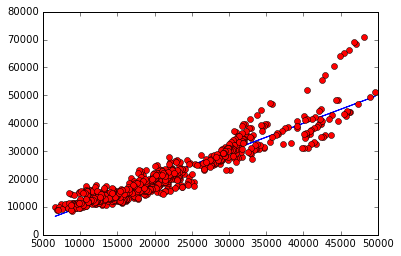

In [139]:
path = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/'
data = pd.read_excel(path + 'Car.xls')

regress = lambda x:smf.ols(formula = 'Price ~ %s'%x, data = data).fit()
# For displaying R^2 and linear model summary
def modelEval(lm, key = 'sale_price'):
    lmy = lm.predict(data)
    print(lm.summary())
    plt.plot(lmy, lmy, 'b-')
    plt.plot(lmy, data[key],'or')

lm = regress(str('Mileage + Make + '+ '+'.join(data.columns[6:])))
modelEval(lm, key = 'Price')

In [141]:
# (a) E(X)
lm.params['Liter']

4760.4180231871887

In [142]:
# (b) What's the probability that X > $4500?
t.sf( (4500 - lm.params['Liter'])/lm.bse['Liter'],lm.df_resid)

0.71427839234185431

In [144]:
# (c) Two-sided 90% confidence interval of X
# Students have 3 different methods of doing this, as long as they have the correct answer
lm.conf_int(alpha=0.1).loc[['Liter'],:]

,0,1
Liter,4002.948181,5517.887866


In [146]:
# (d) One-sided 90% confidence interval of X
print('The 90%% CI is [%f, +inf)'%(t.ppf(0.1,lm.df_resid) * lm.bse['Liter'] + lm.params['Liter']))

The 90% CI is [4170.450507, +inf)


### Q4. Dimension reduction using PCA.  (40 pts)

Let's see the handwriting digits data set. This data set includes 1787 digits. And for each digit, we have 64 binary variables x1,x2,...x64, each one representing a pixel on the 8x8 image (1-belongs to an image, 0-blank). The label (y) for each digit image is the actual digit it represents from 0 to 9.  

In [4]:
#Run the following code.
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


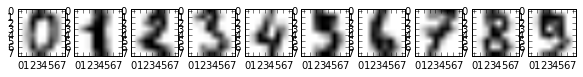

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Let's start our questions. 

#### Part one. We have 64-dimension feature space(exclude y) X.  (5pts+5pts)
a. Assume we need to use PCA to transform X to Xproj.Plot the explained variance for each eigenvector(direction) from high to low in one scatter plot. 

b. What is the total variance of X? How many eigenvectors(directions) do we need to choose if we want to preserve 90% variance of the original data.

#### Part two.
Let's use PCA to reduce the dimensionality of digits data set from 64 to 3. And then  visulize the transformed space on a 3 dimensional plot. Please color the points with respect to their label y. (10 pts)


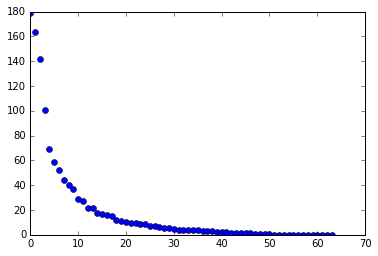

In [6]:
#Part one
#a.
n=64 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
plt.plot(np.arange(n), eigenvalues, 'o');

In [9]:
# b
print "Total varaince is: {}".format(np.var(X,0).sum())
pca = PCA(0.9)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print("we need {} eigenvectors".format(len(Xproj.T)))

Total varaince is: 1201.47873736
we need 21 eigenvectors


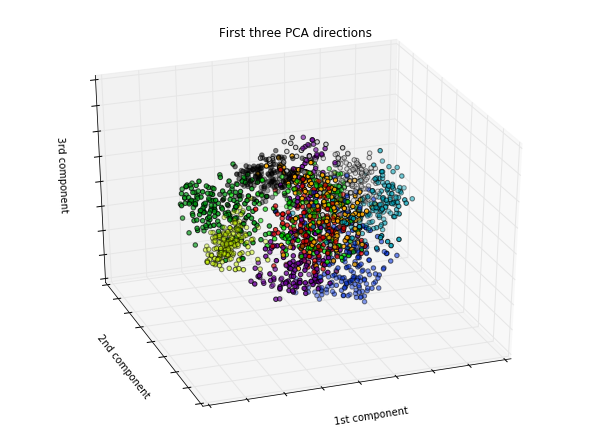

In [16]:
#Part two
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Xproj[:, 0], Xproj[:, 1], Xproj[:, 2], c=np.asarray(data.y),
           cmap=plt.cm.spectral)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd component")
ax.w_zaxis.set_ticklabels([])

plt.show()

#### Part three. Take the data for digits 3 and 8 from the origional data set and call it data1. (20pts)
a. If we use PCA for dimensionality reduction on data1, how big is the percentage of total variance, that the first and second eigenvectors could explain? 

b. Now let's visulize the dimensional feature space of data1 by the first two eigenvectors. Color your points according to the digits they represent.

c. Visulize the feature space using third and fourth eigenvectors(directions).

d. Visulize the feature space using the last two eigenvectors(directions).

the percentage of total variance, that the first and second eigenvectors could explain:0.362281784395


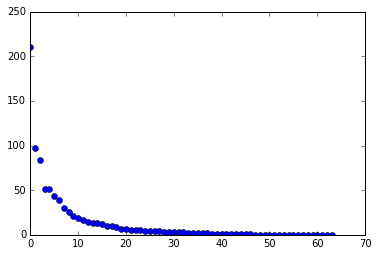

In [28]:
#part three

#a
data1=data[(data.y==3)|(data.y==8)]
X=np.asarray(data1.iloc[:,1:])
n=64 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
plt.plot(np.arange(n), eigenvalues, 'o');

print("the percentage of total variance, that the first and second eigenvectors could explain:{}".format(
    (sum(eigenvalues[:2]))*1.0/sum(eigenvalues)))

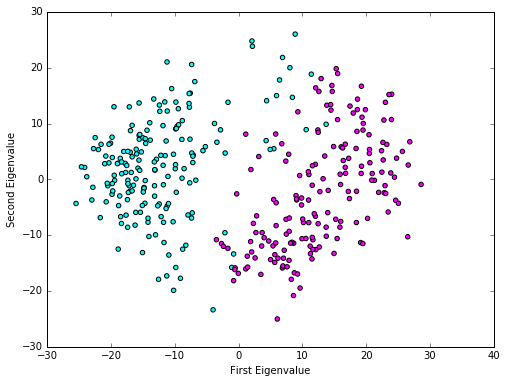

In [47]:
#b
plt.figure(2, figsize=(8, 6))
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=data1.y, cmap=plt.cm.cool)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

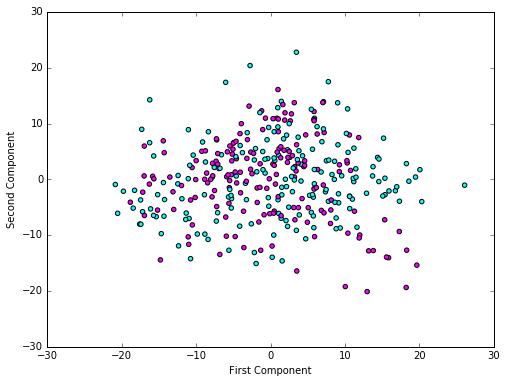

In [48]:
#c
plt.figure(2, figsize=(8, 6))
plt.scatter(Xproj[:, 2], Xproj[:, 3], c=data1.y, cmap=plt.cm.cool)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

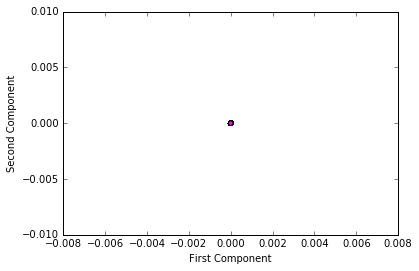

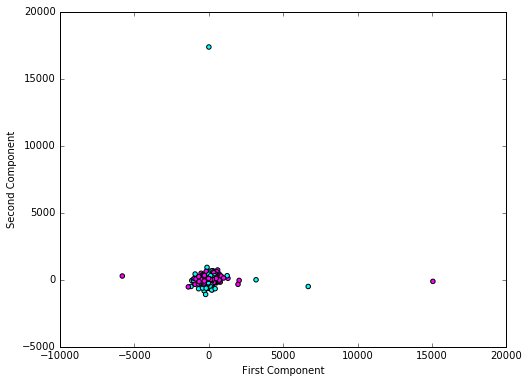

In [63]:
#d
plt.scatter(Xproj[:, -2], Xproj[:, -1], c=data1.y, cmap=plt.cm.cool)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

#d (Alternatively, you could zoom in to see in more details)
plt.figure(2, figsize=(8, 6))
plt.scatter(Xproj[:, -2]*(10**18), Xproj[:, -1]*(10**18), c=data1.y, cmap=plt.cm.cool)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

##### Q5. (30 pts)

In [67]:
data=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474//ADS_Data/session06/data_hw_3_4.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


#### A. Run a linear regression : Y~x1+..+x15 (without constant) and report the summary of this regression result. (5pts)

#### B. Demonstrate the overfitting problem by 1000 times cross-validation.  Report average OS and IS R-squared.  (10 pts)

#### C. Repeat A and B on features after feature selection(p value<0.05). (5pts)

#### D. Transform the data set by PCA and keep all 15 eigenvectors(directions). Call the new data set after transformation Xproj. And repeat questions A and B using Xproj. (10 pts)

In [89]:
### Question A:
import statsmodels.api as sm
y=np.asarray(data.Y)
X=np.asarray(data.iloc[:,1:])
res=sm.OLS(y,data.iloc[:,1:]).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     7.682
Date:                Sun, 23 Oct 2016   Prob (F-statistic):           3.73e-07
Time:                        10:00:42   Log-Likelihood:                -64.562
No. Observations:                  50   AIC:                             159.1
Df Residuals:                      35   BIC:                             187.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.3026      1.692      1.951      0.0

In [72]:
# Question B
from sklearn.linear_model import LinearRegression
R_IS=[]
R_OS=[]
n=1000
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.802075344529
OS R-squared for 1000 times is 0.268459711225


#### (Over-fitting problem exists once you see a obvious difference between IS and OS R-squared) 

In [123]:
# Question C.
y=np.asarray(data.Y)
X=np.asarray(data.iloc[:,1:])
res=sm.OLS(y,X).fit()
# Find the index for variables where pvalues< 0.05
print "pvalues<0.05:", np.where(res.pvalues<0.05)
res=sm.OLS(y,X[:,[7,12,13]]).fit()
print res.summary()

pvalues<0.05: (array([ 7, 12, 13]),)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.1933
Date:                Sun, 23 Oct 2016   Prob (F-statistic):              0.900
Time:                        10:10:46   Log-Likelihood:                -100.68
No. Observations:                  50   AIC:                             207.4
Df Residuals:                      47   BIC:                             213.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             

In [125]:
R_IS=[]
R_OS=[]
n=1000
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X[:,[7,12,13]], y, test_size=0.3)
    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.00420420074032
OS R-squared for 1000 times is -0.273429867886


[  5.09169525e-01   2.06632797e-01   1.33883524e-01   4.17364457e-02
   2.02277309e-02   1.81057444e-02   1.53947481e-02   1.20915599e-02
   1.10064392e-02   9.81383154e-03   6.70442837e-03   5.75611696e-03
   5.35988007e-03   4.11714979e-03   7.93940431e-08]


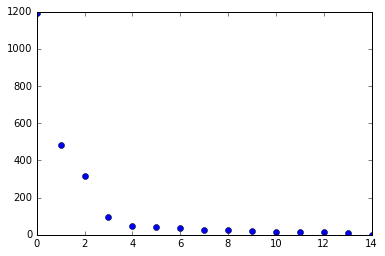

In [127]:
#Question D
n=15 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print pca.explained_variance_ratio_
plt.plot(np.arange(n), eigenvalues, 'o');

In [134]:
import statsmodels.api as sm
res=sm.OLS(y,Xproj).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     10.74
Date:                Sun, 23 Oct 2016   Prob (F-statistic):           5.31e-09
Time:                        10:17:32   Log-Likelihood:                -57.896
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      35   BIC:                             174.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0200      0.004      5.321      0.0

In [136]:
# Here we need to do feature selection by P-values<0.05 firstly. 
print "pvalues<0.05:", np.where(res.pvalues<0.05)
res1=sm.OLS(y,Xproj[:,np.where(res.pvalues<0.05)[0]]).fit()
print res1.summary()

pvalues<0.05: (array([ 0,  1,  3, 11, 12, 14]),)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     22.73
Date:                Sun, 23 Oct 2016   Prob (F-statistic):           5.36e-12
Time:                        10:18:13   Log-Likelihood:                -65.708
No. Observations:                  50   AIC:                             143.4
Df Residuals:                      44   BIC:                             154.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1 

In [137]:
# Using cross validation.Looks much better compared to first one if you remember.
R_IS=[]
R_OS=[]
n=1000
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(Xproj[:,[0,1,3,11,12,14]], y, test_size=0.3)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.759692024652
OS R-squared for 1000 times is 0.592523991166


## Extra-credit assignment 

### EC1 (20 points) "Real" out of sample test. 

Review the cross-validation process of last question carefully, you will find the cross-validation is somehow "fake". The reason is that we accessed the information of validation set when we apply PCA on the whole data set.(You should know why). Redo the cross-validation part for question D in previous question. Run 100 times "real" cross-validation and report OS and IS R-squared. 

Hint: for each loop, split the data set to train and validation set, and using PCA only on training set to find the siginificant eigenvectors(directions), and then transform the test data the same way and pick the same eigenvectors for regression.    

In [154]:
# Using cross validation.Looks much better compared to first one if you remember.
R_IS=[]
R_OS=[]
n=100
from sklearn.cross_validation import train_test_split
for i in range(n):
    # Split data here
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    ########################################################################################
    # In sample:
    # Run PCA on X_train, y_train.
    pca = PCA(15)
    Xproj_tr = pca.fit_transform(X_train)
    
    # Do OLS and feature selection by pvalues<0.05
    res=sm.OLS(y_train,Xproj_tr).fit()
    
    # Do feature selection and run res again
    res1=sm.OLS(y_train,Xproj_tr[:,np.where(res.pvalues<0.05)[0]]).fit()
    # This is the training process, we did not use any information from the testing set.
    R_IS.append(res1.rsquared)
    #########################################################################################
    # Out of sample.
    Xproj_te=pca.transform(X_test)  #Don't use fit_transform. Use the transform only.Why?
    res2=sm.OLS(y_test,Xproj_te[:,np.where(res.pvalues<0.05)[0]]).fit()
    R_OS.append(res2.rsquared)

print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 100 times is 0.758642779458
OS R-squared for 100 times is 0.749771756571


### EC2. When PCA could not work?  (20 points). 

Generate a 2 dimensional feature space with labels to show PCA does not work in the case you made. Plot your data set and explain your reason. This is an open question. Any data set which have two dimensional feature space with good explaination why PCA does not work should be fine.

### Solution:
Let me give two examples. Any similar examples with explanation could be accepted. 

We expect a data set with LABELS,and all the label information should be lost after PCA transformation(To the first Component) as the following two examples show.


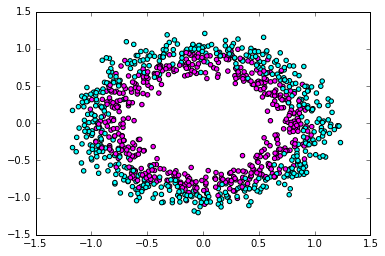

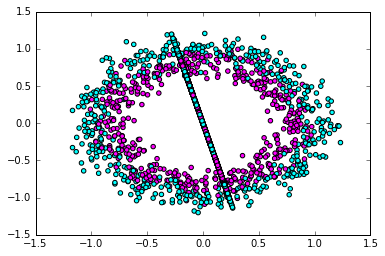

In [226]:
from sklearn import datasets
X,y=datasets.make_circles(n_samples=1000, shuffle=True, noise=0.1)
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.cool)
plt.show()

clf = PCA(1) 
X_trans = clf.fit_transform(X)
X_new = clf.inverse_transform(X_trans) # transformed data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=plt.cm.cool)
plt.show()

### Example 2.

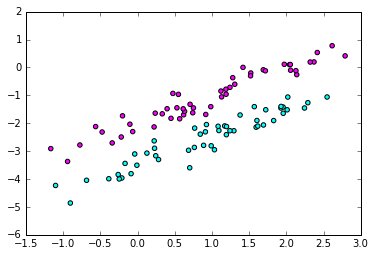

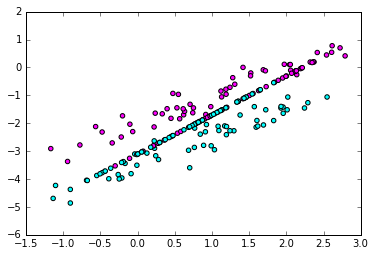

In [224]:
#Generate this artifitial data
mean2 = [1, -1]
mean4 = [1, -2.5]
cov = [[1.0,0.95], [0.95, 1.0]]

X1 = np.random.multivariate_normal(mean2, cov, 50)
X2 = np.random.multivariate_normal(mean4, cov, 50)
X=np.concatenate((X1,X2),axis=0)
y=np.concatenate((np.ones(50),np.zeros(50)))
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.cool)
plt.show()

clf = PCA(1) 
X_trans = clf.fit_transform(X)
X_new = clf.inverse_transform(X_trans) # transformed data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=plt.cm.cool)
plt.show()

### EC3.(Multiple choice, 5pts. Please add short explaination)
Suppose you have two different feature selection choices A and B, and we have already separated the dataset into training set and validation set. Now we want to use "out-of-sample" $R^2$ to evaluate the model prediction power. The regular $R^2$ and adjusted $R^2$ are denoted as $R_A^2$($R_B^2$) and $adR_A^2$ ($adR_B^2$), respectively. Select all statements that are true: 

A. For each selection, we always have $R_A^2 > adR_A^2$ and $R_B^2 > adR_B^2$  
B. For each selection, we may have $R_A^2 < adR_A^2$ or $R_B^2 < adR_B^2$  
C. If $R_A^2 > R_B^2$ then $adR_A^2$ must be greater than $adR_B^2$, vice versa  
D. If $R_A^2 > R_B^2$, $adR_A^2$ still can be less than $adR_B^2$, vice versa  

### Solution: AD
The regular $R^2$:
$$
R^2=1-\frac{RSS}{\sum_i (y_i-\bar{y})^2}=\frac{\sum_i (\hat{y}_i-\bar{y})^2}{\sum_i (y_i-\bar{y})^2},
$$
The adjusted $R^2$:
$$
adj.R^2=1-\frac{RSS}{\sum_i (y_i-\bar{y})^2} \cdot \frac{N-1}{N-P-1} 
$$
where $N$ is the total sample size and $P$ is the number of features/selected variables

Since $P\geq 0$, we know that $\frac{N-1}{N-P-1} \geq 1$, meaning $A \cdot \frac{N-1}{N-P-1} \geq A \cdot 1 = A$ for any non-negative value $A$, or equivalently, $-A \geq -A \cdot \frac{N-1}{N-P-1} $, hence we have
$$
R^2=1-\frac{RSS}{\sum_i (y_i-\bar{y})^2} \geq 1-\frac{RSS}{\sum_i (y_i-\bar{y})^2} \cdot \frac{N-1}{N-P-1} = adj.R^2
$$
for each model selection. A is correct.

However, for different feature selection A and B, we can have $adR_A^2 \leq adR_B^2$ by manipulating the number of selected features $P$ (for some special $P_A$ and $P_B$ choices), even with $R_A^2 > R_B^2$. Hence D.